In [8]:
%pip uninstall pandas numpy -y
%pip install numpy pandas

Found existing installation: pandas 2.2.3
Uninstalling pandas-2.2.3:
  Successfully uninstalled pandas-2.2.3
Found existing installation: numpy 2.2.3
Uninstalling numpy-2.2.3:
  Successfully uninstalled numpy-2.2.3
Note: you may need to restart the kernel to use updated packages.
  Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_x86_64.whl.metadata (62 kB)
  Using cached pandas-2.2.3-cp313-cp313-macosx_10_13_x86_64.whl.metadata (89 kB)
Using cached numpy-2.2.3-cp313-cp313-macosx_14_0_x86_64.whl (6.7 MB)
Using cached pandas-2.2.3-cp313-cp313-macosx_10_13_x86_64.whl (12.5 MB)
Note: you may need to restart the kernel to use updated packages.


In [4]:
%pip install matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.2/8.2 MB 17.1 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 18.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Load JSON Data
def load_json(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# Extract relevant fields from each trial
def extract_trial_data(trial):
    protocol = trial.get("protocolSection", {})  # Use .get() to handle missing keys
    
    return {
        "NCT ID": protocol.get("identificationModule", {}).get("nctId", "Unknown"),
        "Title": protocol.get("identificationModule", {}).get("briefTitle", "Unknown"),
        "Status": protocol.get("statusModule", {}).get("overallStatus", "Unknown"),
        "Phase": (
            protocol.get("designModule", {}).get("phases", ["NA"])[0] 
            if "phases" in protocol.get("designModule", {}) 
            else "NA"
        ),
        "Start Date": protocol.get("statusModule", {}).get("startDateStruct", {}).get("date", "Unknown"),
        "Completion Date": protocol.get("statusModule", {}).get("completionDateStruct", {}).get("date", "Unknown"),
        "Funding Source": protocol.get("sponsorCollaboratorsModule", {}).get("leadSponsor", {}).get("class", "Unknown"),
        "Study Type": protocol.get("designModule", {}).get("studyType", "Unknown"),
        "Enrollment": protocol.get("designModule", {}).get("enrollmentInfo", {}).get("count", 0),
        "Location": (
            protocol.get("contactsLocationsModule", {}).get("locations", [{}])[0].get("country", "Unknown")
            if protocol.get("contactsLocationsModule", {}).get("locations") 
            else "Unknown"
        ),
        "Treatment Type": (
            protocol.get("armsInterventionsModule", {}).get("interventions", [{}])[0].get("type", "Unknown")
            if protocol.get("armsInterventionsModule", {}) 
            else "Unknown"
        ),
    }


In [5]:
# Process full dataset
def process_trials(json_data):
    trials = []
    for entry in json_data:
        for trial in entry:
            trials.append(extract_trial_data(trial))
    return pd.DataFrame(trials)

# Load Data
file_path = "pancreatic cancer.json"  # Change this to your actual file path
json_data = load_json(file_path)



In [8]:
# Convert to DataFrame
df = process_trials(json_data)

# Save to CSV for easy review
df.to_csv("pancreatic_cancer_trials.csv", index=False)

Total Trials: 2572
Unique Phases: ['NA' 'PHASE2' 'PHASE1' 'PHASE3' 'EARLY_PHASE1' 'PHASE4']
Unique Funding Sources: ['OTHER' 'INDUSTRY' 'NIH' 'OTHER_GOV' 'NETWORK' 'INDIV' 'UNKNOWN']


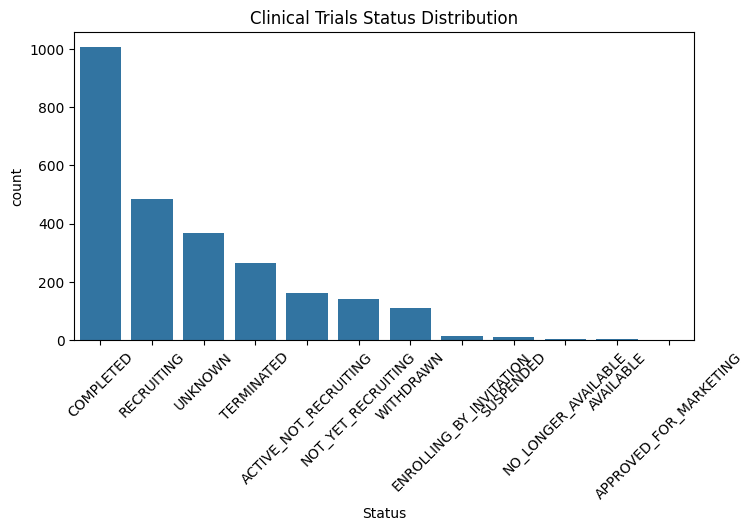

In [9]:
# Display Summary
print("Total Trials:", len(df))
print("Unique Phases:", df["Phase"].unique())
print("Unique Funding Sources:", df["Funding Source"].unique())

# Count Active vs. Completed Trials
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Status", order=df["Status"].value_counts().index)
plt.title("Clinical Trials Status Distribution")
plt.xticks(rotation=45)
plt.show()

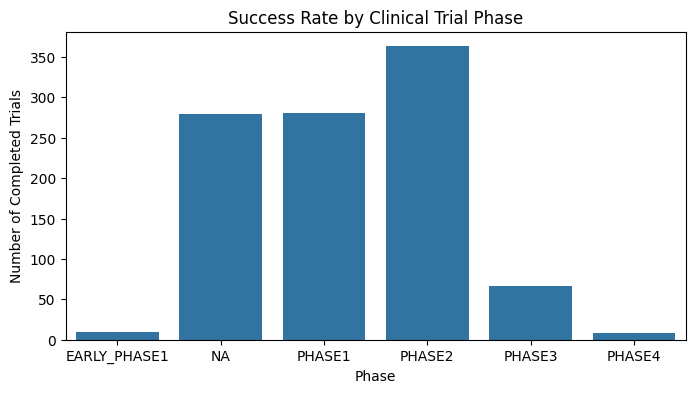

In [10]:
# Success Rate Analysis (Completed vs. Phase Progression)
df_success = df[df["Status"] == "COMPLETED"]
phase_counts = df_success["Phase"].value_counts().sort_index()

plt.figure(figsize=(8, 4))
sns.barplot(x=phase_counts.index, y=phase_counts.values)
plt.title("Success Rate by Clinical Trial Phase")
plt.xlabel("Phase")
plt.ylabel("Number of Completed Trials")
plt.show()

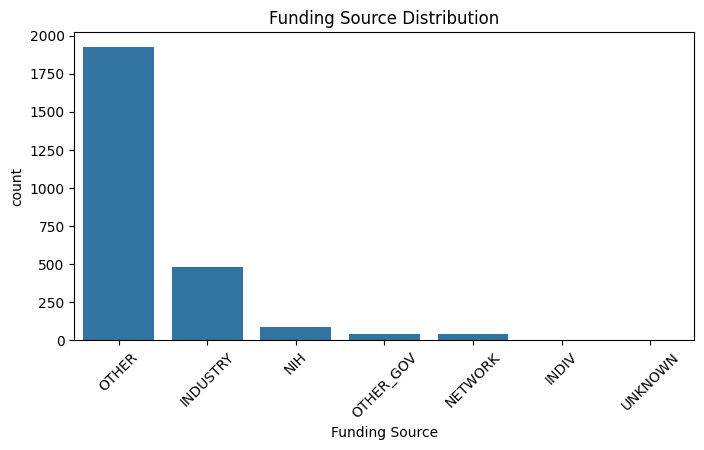

In [11]:
# Funding Source Analysis
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x="Funding Source", order=df["Funding Source"].value_counts().index)
plt.title("Funding Source Distribution")
plt.xticks(rotation=45)
plt.show()


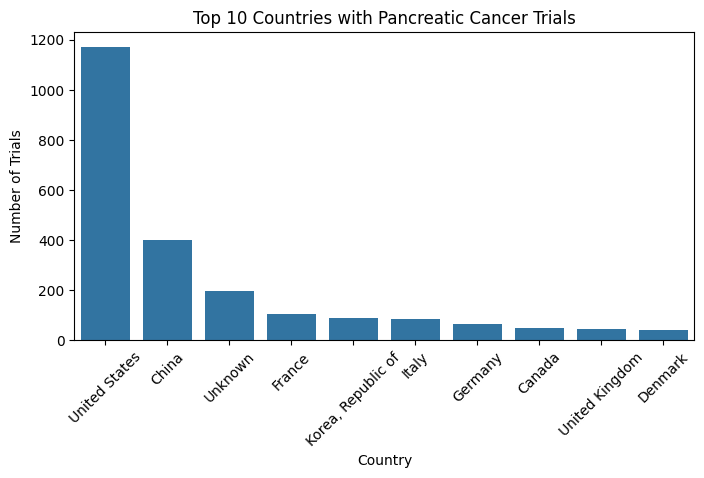

In [12]:
# Geographic Distribution
geo_counts = df["Location"].value_counts().head(10)  # Top 10 countries
plt.figure(figsize=(8, 4))
sns.barplot(x=geo_counts.index, y=geo_counts.values)
plt.title("Top 10 Countries with Pancreatic Cancer Trials")
plt.xlabel("Country")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()

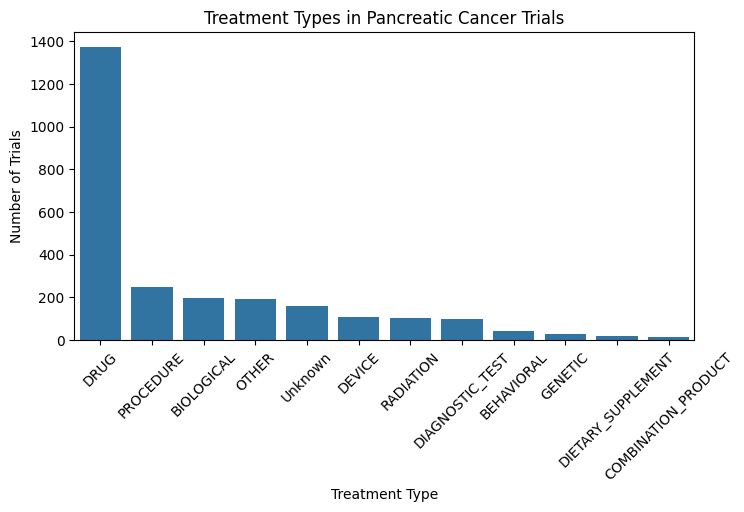

In [13]:
# Treatment Innovations
treatment_counts = df["Treatment Type"].value_counts()
plt.figure(figsize=(8, 4))
sns.barplot(x=treatment_counts.index, y=treatment_counts.values)
plt.title("Treatment Types in Pancreatic Cancer Trials")
plt.xlabel("Treatment Type")
plt.ylabel("Number of Trials")
plt.xticks(rotation=45)
plt.show()